<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Preoprocessing" data-toc-modified-id="Preoprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preoprocessing</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Обучение-моделей-без-учета-дисбаланса-классов" data-toc-modified-id="Обучение-моделей-без-учета-дисбаланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей без учета дисбаланса классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling-+-class_weight-+-balanced_split" data-toc-modified-id="Upsampling-+-class_weight-+-balanced_split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling + class_weight + balanced_split</a></span></li><li><span><a href="#Downsampling-+-class_weight-+-balanced_split" data-toc-modified-id="Downsampling-+-class_weight-+-balanced_split-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling + class_weight + balanced_split</a></span></li></ul></li><li><span><a href="#Оптимизация-параметров-наилучшей-модели" data-toc-modified-id="Оптимизация-параметров-наилучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Оптимизация параметров наилучшей модели</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

**Цель:** постройка модели прогнозирования ухода клиента из банка, с предельно большим значением F1-меры.

**Задачи:**
1. Загрузка и подготовка данных.
2. Исследование баланса классов.
3. Обучение модели без учета дисбаланса классов.
4. Улучшение качества моделей.
5. Поиск наилучшей модели.
6. Финальное тестирование.

**Предмет исследования** выборка данных по клиентам «Бета-Банка».

**Методы:**
которые мы применим в данном исследовании включают в себя: ознакомление, предобработку, обучения моделей машинного обучения, повышение метрик моделей.

**Структура проекта:**
проектная работа состоит из обзора и предобработки данных, затем следует изучение точности различных моделей, финальное тестирование наилучшей модели, работа завершается общим выводом. 



## Подготовка данных

In [58]:
 # Импорт библиотек:
import pandas as pd
import pylab as pl
import warnings
from matplotlib import pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.metrics import f1_score, make_scorer

In [59]:
 # Отключим некритические предупреждения в коде.
warnings.filterwarnings("ignore")

In [60]:
 # Присвоим переменной df значение нашего датафрейма.
df = pd.read_csv('Churn.csv')

In [61]:
 # Выведем первые пять строк нашего датафрейма
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
 # Общая информация о столбцах нашего датафрейма и количестве пропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
 # Информация о диапазонах значений 
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


На первый взгляд никакой зависимости в пропущенных значениях не замечено:

In [8]:
df.query('Tenure != Tenure').head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Колонки: "RowNumber", "CustomerId", "Surname" не несут никакой информации для нашей модели, избавимся от них:

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проверка на не явные дубликаты:

In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [13]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [14]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [15]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [16]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [17]:
df['Exited'].unique()

array([1, 0], dtype=int64)

Не явных дубликатов не обнаружено:

Значения в колонках 'Balance' и 'EstimatedSalary' приведем к типу "int":

In [18]:
df[['Balance', 'EstimatedSalary']] = df[['Balance', 'EstimatedSalary']].astype('int')

Проверим как связанна балансировка классов и целевой признак в столбце 'Tenure':

In [19]:
df_tenure_nan = df.query('Tenure != Tenure')
df_tenure_not_nan = df.query('Tenure == Tenure')

In [20]:
df_tenure_nan['Exited'].value_counts(1)

0    0.79868
1    0.20132
Name: Exited, dtype: float64

In [21]:
df_tenure_not_nan['Exited'].value_counts(1)

0    0.796062
1    0.203938
Name: Exited, dtype: float64

Зависимости не обнаружено - классы распределены пропорционально. Взгдянем на распределение значений в столбце с целевым признаком:

In [22]:
df.groupby(by=['Tenure'], dropna=False)['Exited'].sum()

Tenure
0.0      90
1.0     213
2.0     185
3.0     198
4.0     184
5.0     187
6.0     177
7.0     160
8.0     174
9.0     194
10.0     92
NaN     183
Name: Exited, dtype: int64

Значения распределены нормально, оптимальной стратегии заполнения пропущенных значений нет, чтобы не искажать данные и не терять значения целевого признака - заполним пропущенные значения случайными значениями диапазоном от 0 до 10:

In [23]:
df.groupby(by=['Tenure'], dropna=False)['Exited'].sum()

Tenure
0.0      90
1.0     213
2.0     185
3.0     198
4.0     184
5.0     187
6.0     177
7.0     160
8.0     174
9.0     194
10.0     92
NaN     183
Name: Exited, dtype: int64

In [24]:
np.random.seed(12345)
data = (np.random.randint(0,10, size=df['Tenure'].isna().sum()))
df.loc[df['Tenure'].isna(), 'Tenure'] = data

Проверка распределения:

In [25]:
df.groupby(by=['Tenure'], dropna=False)['Exited'].sum()

Tenure
0.0     111
1.0     225
2.0     207
3.0     220
4.0     201
5.0     206
6.0     203
7.0     175
8.0     188
9.0     209
10.0     92
Name: Exited, dtype: int64

### Проверка на дубликаты

In [26]:
df.duplicated().sum()

0

Явных дубликатов не обнаружили.

### Preoprocessing

Категоральные перееменные в колонках 'Geography' и 'Gender'  преобразуем при помощи One-hot-encoding, чтобы не попасть в дамми-ловушку используем аргумент drop_first=True: 

In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0,1,1,1,101348,1,0,0,0
1,608,41,1.0,83807,1,0,1,112542,0,0,1,0
2,502,42,8.0,159660,3,1,0,113931,1,0,0,0
3,699,39,1.0,0,2,0,0,93826,0,0,0,0
4,850,43,2.0,125510,1,1,1,79084,0,0,1,0


## Исследование задачи

Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

### Исследование баланса классов

<AxesSubplot:ylabel='Exited'>

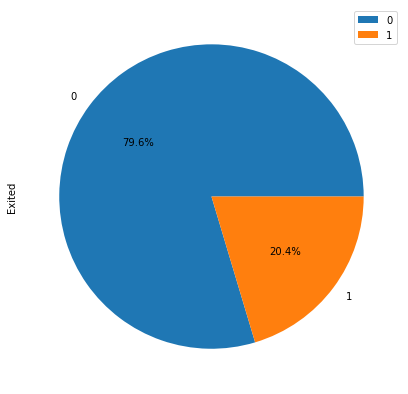

In [28]:
df['Exited'].value_counts(1).plot(kind='pie', legend=True, autopct='%1.1f%%', figsize=(7, 7))

Наш датасет имеет разбалансировку классов, только 20 процентов данных относиться к целевому признаку. 

### Обучение моделей без учета дисбаланса классов

Мы будем проверять четыре модели:

In [29]:
lr = LogisticRegression(random_state=12345)
dtc = tree.DecisionTreeClassifier(random_state=12345)
rfc = RandomForestClassifier(random_state=12345)
gbc = GradientBoostingClassifier(random_state=12345)

In [30]:
scaler = StandardScaler() 
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']

In [31]:
 # создаем функцию, которая будет принимат датасеты с признаками и таргетом и увеличивать 
 # количество строк с классом 1 в требуемое количество раз
def upsample(features, target, repeat):
    features_zeros = features[target == 0] # выделяем объекты с классом 0
    features_ones = features[target == 1] # с классов 1
    target_zeros = target[target == 0] # аналогично для датасета с таргетом
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) # умножаем объекты класса 1 и соединяем датасеты
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) # аналогично для таргета

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345) # перемешиваем объекты

    return features_upsampled, target_upsampled

In [32]:
# создаем функцию, которая будет уменьшать количество объектов класса 0 в заданных датасетах
def downsample(features, target, fraction):
    features_zeros = features[target == 0] # выделяем объекты с классом 0
    features_ones = features[target == 1] # с классов 1
    target_zeros = target[target == 0] # аналогично для датасета с таргетом
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) # уменьшаем объекты класса 0 и соединяем датасеты
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]) # аналогично для таргета

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345) # перемешиваем объекты

    return features_downsampled, target_downsampled

Функция разделения выборки на тренировочную, валидационную и тестовые выборки, с балансировкой по классам и без:

In [33]:
 # создаем функцию, которая разделяет переданный ей в качестве аргумента 'data' датасет данных.
 # data - датасет
 # switch - переключатель использования стратификации по целевому признаку выборки data (True, False)
 # samp - переключатель использования upsampling, downsampling, mormal
def split_fun(data, switch, samp):
    target = data['Exited'] # таргет
    features = data.drop('Exited', axis=1) # признаки
    
     # разделение выборки
    if switch == False:
        features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                                    target, 
                                                                                    test_size=0.25, 
                                                                                    random_state=12345)
     
    elif switch == True:
        features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                                    target, 
                                                                                    test_size=0.25, 
                                                                                    random_state=12345, 
                                                                                    stratify=target)
        
     # самплирование
    if samp == 'norm':
        features_train, target_train = features_train, target_train
        
    elif samp == 'upsampling':
        rat = len(df.loc[df['Exited']==0]) // len(df.loc[df['Exited']==1])
        features_train, target_train = upsample(features_train, target_train, rat)
        
    elif samp == 'downsampling':
        rat = len(df.loc[df['Exited']==1]) / len(df)
        features_train, target_train = downsample(features_train, target_train, rat)
        
     # скалирование   
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    
    return features_train, target_train, features_test, target_test   

Функция для вывода точности, f1 меры и roc_auc результата:

In [34]:
 # создаем функцию, которая выводит данные по модели: точность, f1 мера и roc_auc результат.
 # model - модель
 # data - датасет
 # switch - переключатель использования стратификации по целевому признаку выборки data (True, False)
 # samp - переключатель использования upsampling, downsampling, mormal
def score_fun(model, data, switch, samp):
  
    features_train, target_train, features_test, target_test = split_fun(data, switch, samp) # Вызов функции разделения датасета 
    model.fit(features_train, target_train) # Обучение модели
    
    accuracy = accuracy_score(target_test, model.predict(features_test)) # Точность
    f1 = f1_score(target_test, model.predict(features_test)) # f1
    roc_auc = roc_auc_score(target_test, model.predict(features_test)) # roc_auc
    
    nl = '\n'
    print(f'Модель {model}: {nl}Точность: {accuracy}')
    print(f'F1-мера: {f1}')
    print(f'roc_auc {roc_auc}')

In [35]:
score_fun(lr, df, False, 'norm')

Модель LogisticRegression(random_state=12345): 
Точность: 0.7968
F1-мера: 0.29050279329608936
roc_auc 0.5776033863641769


In [36]:
score_fun(dtc, df, False, 'norm')

Модель DecisionTreeClassifier(random_state=12345): 
Точность: 0.7836
F1-мера: 0.49953746530989823
roc_auc 0.682107440964543


In [37]:
score_fun(rfc, df, False, 'norm')

Модель RandomForestClassifier(random_state=12345): 
Точность: 0.8512
F1-мера: 0.557142857142857
roc_auc 0.7006254310242324


In [38]:
score_fun(gbc, df, False, 'norm')

Модель GradientBoostingClassifier(random_state=12345): 
Точность: 0.8604
F1-мера: 0.5898942420681551
roc_auc 0.718039999048774


## Борьба с дисбалансом

Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.

### Upsampling + class_weight + balanced_split

In [39]:
lr = LogisticRegression(random_state=12345, class_weight='balanced')
dtc = tree.DecisionTreeClassifier(random_state=12345, class_weight='balanced')
rfc = RandomForestClassifier(random_state=12345, class_weight='balanced')

In [40]:
score_fun(lr, df, True, 'upsampling')

Модель LogisticRegression(class_weight='balanced', random_state=12345): 
Точность: 0.7092
F1-мера: 0.5010295126973233
roc_auc 0.712137329179737


In [41]:
score_fun(dtc, df, True, 'upsampling')

Модель DecisionTreeClassifier(class_weight='balanced', random_state=12345): 
Точность: 0.8028
F1-мера: 0.49745158002038736
roc_auc 0.6824279986856374


In [42]:
score_fun(rfc, df, True, 'upsampling')

Модель RandomForestClassifier(class_weight='balanced', random_state=12345): 
Точность: 0.8588
F1-мера: 0.6150490730643401
roc_auc 0.7453713616973827


In [43]:
score_fun(gbc, df, True, 'upsampling')

Модель GradientBoostingClassifier(random_state=12345): 
Точность: 0.8348
F1-мера: 0.6367634124890061
roc_auc 0.7887986114331782


### Downsampling + class_weight + balanced_split

In [44]:
score_fun(lr, df, True, 'downsampling')

Модель LogisticRegression(class_weight='balanced', random_state=12345): 
Точность: 0.7068
F1-мера: 0.5030508474576271
roc_auc 0.7150176777818456


In [45]:
score_fun(dtc, df, True, 'downsampling')

Модель DecisionTreeClassifier(class_weight='balanced', random_state=12345): 
Точность: 0.6692
F1-мера: 0.48665425201738055
roc_auc 0.7067664016561758


In [46]:
score_fun(rfc, df, True, 'downsampling')

Модель RandomForestClassifier(class_weight='balanced', random_state=12345): 
Точность: 0.7468
F1-мера: 0.5685071574642127
roc_auc 0.7737653428641067


In [47]:
score_fun(gbc, df, True, 'downsampling')

Модель GradientBoostingClassifier(random_state=12345): 
Точность: 0.7524
F1-мера: 0.578050443081118
roc_auc 0.7823994813596351


Наилучший результаты:

Точность: 0.8348
F1-мера: 0.6367634124890061
roc_auc 0.7887986114331782

показала модель GradientBoostingClassifier(random_state=12345) при использовании: upsampling и стратификациии.

## Оптимизация параметров наилучшей модели

In [48]:
target = df['Exited']
features = df.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=12345, 
                                                                            stratify=target)


rat = len(df.loc[df['Exited'] == 0]) // len(df.loc[df['Exited'] == 1])
features_train, target_train = upsample(features_train, target_train, rat)

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [57]:
%%time

f1 = make_scorer(f1_score)

pipe = Pipeline(steps=[("gbc", gbc)]) # Создаем пайплайн

 # Задаем решетку параметров пайплайна
param_grid = {'gbc__learning_rate': [0.01],
              'gbc__n_estimators': [70]}

 # Создаем нашу модель и передаем ей пайплайн, решетку параметров, также используем кросс-валидацию результата    
grid_search_cv_gbc = GridSearchCV(pipe, param_grid, n_jobs=8, cv=5, scoring=f1)

 # Обучаем модель на тренировочной части выборки:
grid_search_cv_gbc.fit(features_train, target_train)

best_params_gbc = grid_search_cv_gbc.best_params_ # Лучшие параметры
best_gbc = grid_search_cv_gbc.best_estimator_ # Лучшая модель
best_gbc_score = grid_search_cv_gbc.best_score_ # Лучший результат

print(f'Точность модели {gbc} на тренировочной выборке составила: \
      {best_gbc_score} с параметрами \
      {best_params_gbc}')
print(f1_score(target_train, best_gbc.predict(features_train)))
print(roc_auc_score(target_train, best_gbc.predict(features_train)))

Точность модели GradientBoostingClassifier(random_state=12345) на тренировочной выборке составила:       0.6228470869238345 с параметрами       {'gbc__learning_rate': 0.01, 'gbc__n_estimators': 70}
0.6277432712215321
0.7156354435884039
Wall time: 950 ms


## Тестирование модели

In [50]:
predictions_gbc = best_gbc.predict(features_test) # прогноз наилучшей модели RandomForestClassifier()
accuracy_gbc_score = accuracy_score(target_test, predictions_gbc) # Точность

accuracy = accuracy_score(target_test, predictions_gbc)
f1 = f1_score(target_test, predictions_gbc)
roc_auc = roc_auc_score(target_test, predictions_gbc)
nl = '\n'
print(f'Модель { best_gbc[0]}: {nl}Точность: {accuracy}')
print(f'F1-мера: {f1}')
print(f'roc_auc {roc_auc}')

Модель GradientBoostingClassifier(n_estimators=39, random_state=12345): 
Точность: 0.8416
F1-мера: 0.6419529837251355
roc_auc 0.7879495055845609


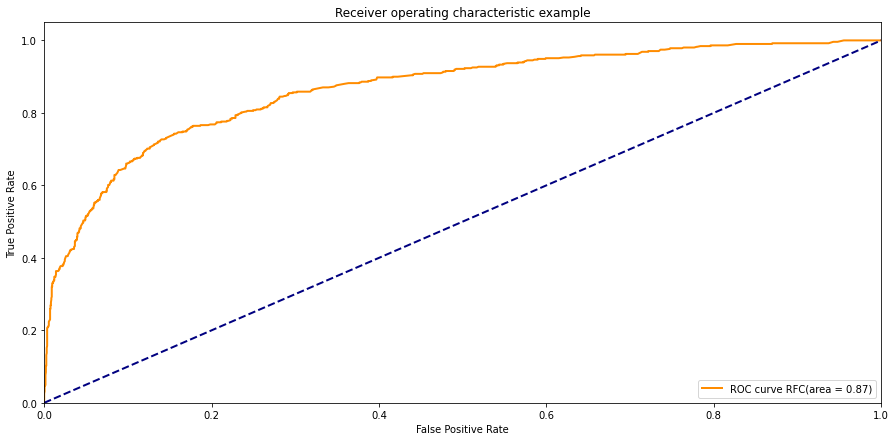

In [51]:
y_pred_proba = best_gbc[0].predict_proba(features_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(target_test,  y_pred_proba)
auc = roc_auc_score(target_test, y_pred_proba)

plt.figure(figsize=(15, 7))
lw = 2
plt.plot(fpr,
         tpr,
         color="darkorange",
         lw=lw,
         label="ROC curve RFC(area = %0.2f)" % auc
)

plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=lw, 
         linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

**Общий вывод:**

Мы ознакомились с датасетом, провели предварительную обработку данных: привели данные к нужным нам типам, заполнили пропущенные значения, стандартизировали значения, разложили категориальные данные на отдельные колонки. 

Затем мы исследовали разные методы обработки разбалансировки классов и пришли к выводу что наилучшим образом для нашего датасета подходит: Upsampling + balanced_split. 

При такой предобработке модель GradientBoostingClassifier показала наилучший результат. При финальном тестировании и использовании настройки гиперпараметров {'gbc__learning_rate': 0.1, 'gbc__n_estimators': 39} удалось достигнуть результатов: 

1. Точность: 0.8416
2. F1-мера: 0.6419529837251355
3. roc_auc 0.7879495055845609

Ссылка на репозиторий: https://github.com/DaniilTsalik/with_teacher_learning.git